<a href="https://colab.research.google.com/github/brandon-mason/cs4337-collabs/blob/main/Chapter3_OpenCVApplication_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://images.saymedia-content.com/.image/t_share/MTc2Mjg2OTE5Nzc5ODIwNzE3/horsing-around-horses-do-the-funniest-things.jpg -O image1.jpg
!wget -q https://parade.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTkwNTgxMTA1NjY0MjA1OTQ5/funny-pictures.webp -O image2.jpg
!wget -q https://www.usatoday.com/gcdn/authoring/authoring-images/2023/10/05/USAT/71072164007-jacek-stankiewicz-dispute.jpg -O image3.jpg
!wget -q https://cdn.mos.cms.futurecdn.net/aswWNrtS45neL87xPmu86T.jpg -O image4.jpg

---

## 6. Face Detection using Haar Cascades

### Objective
Detect faces in images using OpenCV's pre-trained Haar Cascade classifiers.

### Loading Haar Cascade

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

In [ ]:
!pip install -q yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 68.5 MB/s eta 0:00:00


In [ ]:
!yt-dlp -o "meme.%(ext)s" https://www.youtube.com/watch?v=cdIs7VujZqs

[youtube] Extracting URL: https://www.youtube.com/watch?v=cdIs7VujZqs
[youtube] cdIs7VujZqs: Downloading webpage
[youtube] cdIs7VujZqs: Downloading ios player API JSON
[youtube] cdIs7VujZqs: Downloading mweb player API JSON
[youtube] cdIs7VujZqs: Downloading player e627e516
[youtube] cdIs7VujZqs: Downloading m3u8 information
[info] cdIs7VujZqs: Downloading 1 format(s): 243+251
[download] Destination: meme.f243.webm
[download] 100% of   71.98KiB in 00:00:00 at 324.07KiB/s
[download] Destination: meme.f251.webm
[download] 100% of    4.94KiB in 00:00:00 at 35.68KiB/s
[Merger] Merging formats into "meme.webm"
Deleting original file meme.f251.webm (pass -k to keep)
Deleting original file meme.f243.webm (pass -k to keep)


In [ ]:
# Load video file as frames
video_path = 'meme.webm'

# Load video frames
def load_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

video_frames = load_video_frames(video_path)

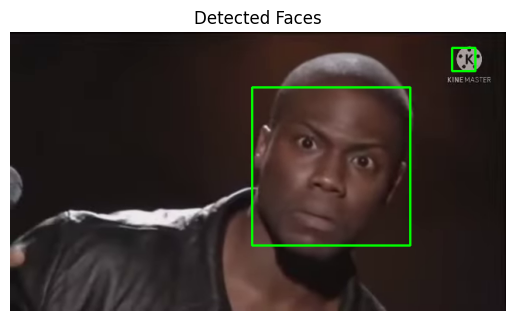

In [ ]:
image = video_frames[28].copy()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=3)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected faces
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Detected Faces')
plt.axis('off')
plt.show()

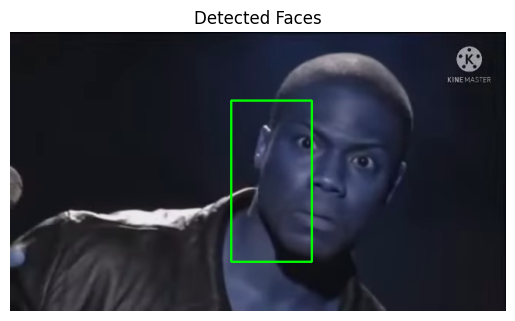

In [ ]:
import cv2

# Initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

image = video_frames[28].copy()

# Detect faces in the image
faces, _ = hog.detectMultiScale(image, winStride=(3, 3), padding=(2, 2), scale=1.05)

# Draw bounding boxes
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(image)
plt.title('Detected Faces')
plt.axis('off')
plt.show()

ref: https://docs.opencv.org/4.x/d0/dd4/tutorial_dnn_face.html

ref: https://github.com/opencv/opencv_zoo/tree/main/models/face_recognition_sface

ref: https://github.com/opencv/opencv_zoo

---

## 7. Feature Descriptor, Key Points Matching


In [ ]:
import os

# List of image filenames
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg']

# # Load images into a list
images = [cv2.imread(file) for file in image_files]

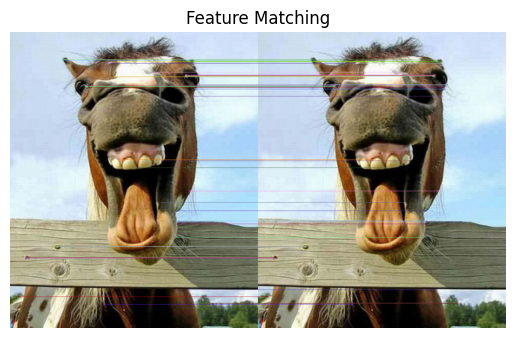

In [ ]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(images[0], None)
kp2, des2 = orb.detectAndCompute(images[0], None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matched_img = cv2.drawMatches(images[0], kp1, images[0], kp2, matches[:50], None, flags=2)
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.axis('off')
plt.show()

### What is ORB?

ORB (Oriented FAST and Rotated BRIEF) is a computer vision algorithm used for **feature detection and description**.

* **FAST (Features from Accelerated Segment Test)** is used to quickly find keypoints in an image.
* **BRIEF (Binary Robust Independent Elementary Features)** is used to create a compact, binary descriptor for each keypoint.
* ORB adds **orientation and rotation invariance**, making it more robust to rotated or scaled images.

In short: ORB is a fast, efficient, and free alternative to SIFT/SURF, often used for tasks like image matching, object recognition, and SLAM.


- FAST

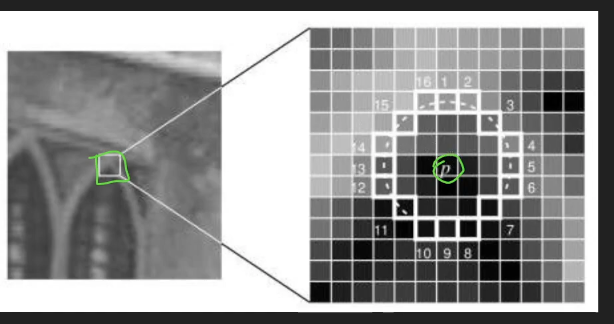

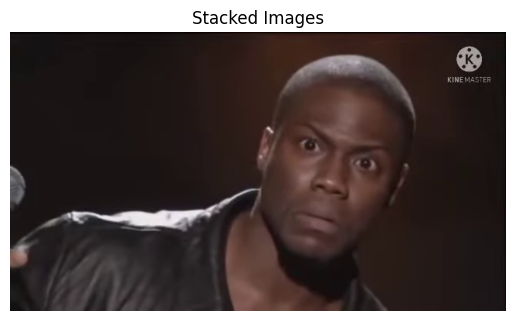

In [ ]:
import cv2
import numpy as np

# Function to align images
def align_images(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Detect ORB keypoints and descriptors
    orb = cv2.ORB_create(1000)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Match descriptors using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract location of good matches
    points1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    points2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Find homography matrix to align images
    H, _ = cv2.findHomography(points2, points1, cv2.RANSAC, 5.0)

    # Warp the second image to align with the first
    height, width, _ = image1.shape
    aligned_image = cv2.warpPerspective(image2, H, (width, height))

    return aligned_image

# Load the images
image1 = video_frames[40].copy()
image2 = video_frames[41].copy()

# Align the second image to the first
aligned_image2 = align_images(image1, image2)

# Stack the aligned images (simple averaging for demonstration)
stacked_image = cv2.addWeighted(image1, 0.5, aligned_image2, 0.5, 0)

# Display the stacked image
plt.imshow(cv2.cvtColor(stacked_image, cv2.COLOR_BGR2RGB))
plt.title('Stacked Images')
plt.axis('off')
plt.show()

100%|██████████| 9/9 [00:00<00:00, 25.77it/s]


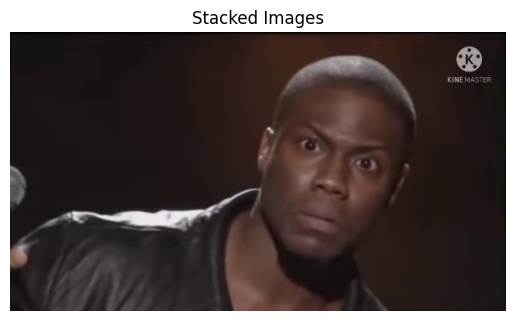

In [ ]:
from tqdm import tqdm
# Load the images
start_index, end_index = 40, 50
base_image = video_frames[start_index].copy()
for i in tqdm(range(start_index + 1, end_index)):
  next_image = video_frames[i]
  aligned_image = align_images(base_image, next_image)
  base_image = cv2.addWeighted(base_image, 0.5, aligned_image, 0.5, 0)

# Display the stacked image
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Stacked Images')
plt.axis('off')
plt.show()

In [ ]:
!pip install -q gdown

In [ ]:
!gdown 1Jx5UoIsp_PdJl0oKdHcmTjL7RoJaD7kH

Downloading...
From (original): https://drive.google.com/uc?id=1Jx5UoIsp_PdJl0oKdHcmTjL7RoJaD7kH
From (redirected): https://drive.google.com/uc?id=1Jx5UoIsp_PdJl0oKdHcmTjL7RoJaD7kH&confirm=t&uuid=da63329f-91c5-48bd-a764-f6806f7efa15
To: /content/moonjpgs.zip
100% 33.4M/33.4M [00:00<00:00, 44.9MB/s]


In [ ]:
!unzip moonjpgs.zip

Archive:  moonjpgs.zip
   creating: moonjpgs/
  inflating: moonjpgs/DSC02728.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02728.jpg  
  inflating: moonjpgs/DSC02714.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02714.jpg  
  inflating: moonjpgs/DSC02700.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02700.jpg  
  inflating: moonjpgs/DSC02675.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02675.jpg  
  inflating: moonjpgs/DSC02701.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02701.jpg  
  inflating: moonjpgs/DSC02715.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02715.jpg  
  inflating: moonjpgs/DSC02729.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02729.jpg  
  inflating: moonjpgs/DSC02703.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02703.jpg  
  inflating: moonjpgs/DSC02717.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02717.jpg  
  inflating: moonjpgs/DSC02677.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02677.jpg  
  inflating: moonjpgs/DSC02688.jpg   
  inflating: __MACOSX/moonjpgs/._DSC02688.jpg  
  inflat

100%|██████████| 144/144 [00:34<00:00,  4.12it/s]


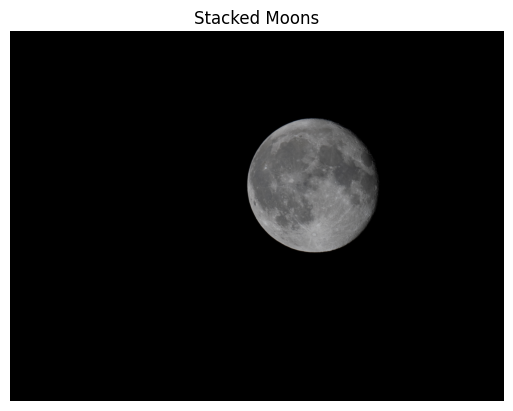

In [ ]:
# Load the images
from pathlib import Path
from tqdm import tqdm
moons = list(Path('moonjpgs').glob('*.jpg'))

stacked_moon = cv2.imread(str(moons[0]))
for moon_path in tqdm(moons[1:]):
  aligned_image = align_images(stacked_moon, cv2.imread(str(moon_path)))
  stacked_moon = cv2.addWeighted(stacked_moon, 0.5, aligned_image, 0.5, 0)

# Display the stacked image
plt.imshow(cv2.cvtColor(stacked_moon, cv2.COLOR_BGR2RGB))
plt.title('Stacked Moons')
plt.axis('off')
plt.show()

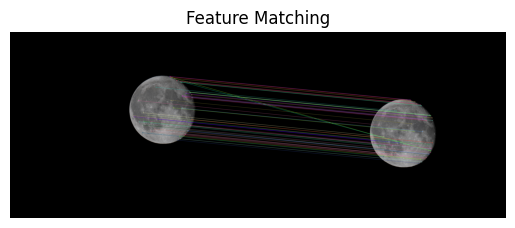

In [ ]:
moons_1 = cv2.imread(str(moons[0]))
moons_2 = cv2.imread(str(moons[-1]))
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(moons_1, None)
kp2, des2 = orb.detectAndCompute(moons_2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matched_img = cv2.drawMatches(moons_1, kp1, moons_2, kp2, matches[:50], None, flags=2)
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.axis('off')
plt.show()

In [ ]:
!wget -q https://i0.wp.com/suxxesphoto.com/wp-content/uploads/2023/08/kingston-ridge-panoramic-view-souht-downs.jpg -O lscape.jpg

lscapejpg.shape = (467, 1400, 3)


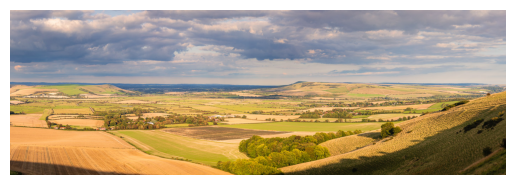

In [ ]:
lscapejpg = cv2.cvtColor(cv2.imread('lscape.jpg'), cv2.COLOR_BGR2RGB)
print(f"{lscapejpg.shape = }")
plt.imshow(lscapejpg)
plt.axis('off')
plt.show()

(-0.5, 349.5, 466.5, -0.5)

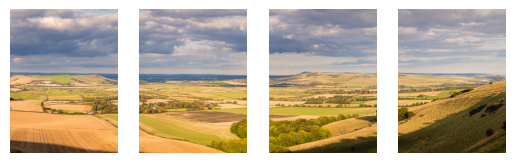

In [ ]:
imgs_fov_small = [lscapejpg[:, 350*i:350*(i+1)] for i in range(4)]
plt.subplot(1, 4, 1)
plt.imshow(imgs_fov_small[0])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imgs_fov_small[1])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imgs_fov_small[2])
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imgs_fov_small[3])
plt.axis('off')

(-0.5, 399.5, 466.5, -0.5)

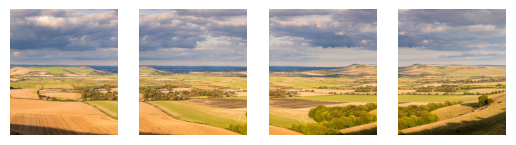

In [ ]:
imgs_fov_small = [lscapejpg[:, 250*i:250*i + 400] for i in range(5)]

plt.subplot(1, 4, 1)
plt.imshow(imgs_fov_small[0])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imgs_fov_small[1])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imgs_fov_small[2])
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imgs_fov_small[3])
plt.axis('off')

## Image Inpainting to Fill Unfilled Regions

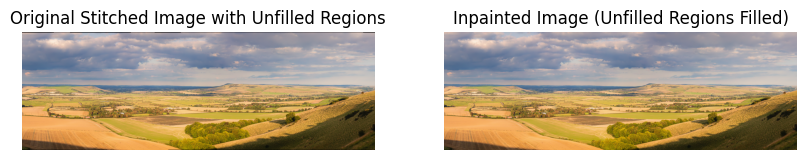

In [ ]:
# Create a mask of the black regions (unfilled areas)
gray_stitched = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray_stitched, 1, 255, cv2.THRESH_BINARY_INV)[1]

# Inpainting the black regions using the mask
# Inpainting method: cv2.INPAINT_TELEA or cv2.INPAINT_NS
inpainted_image = cv2.inpaint(stitched_image, mask, 3, cv2.INPAINT_TELEA)

# Convert BGR to RGB for display
stitched_rgb = stitched_image
inpainted_rgb = inpainted_image

# Display the original stitched image with unfilled regions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(stitched_rgb)
plt.title('Original Stitched Image with Unfilled Regions')
plt.axis('off')

# Display the inpainted result
plt.subplot(1, 2, 2)
plt.imshow(inpainted_rgb)
plt.title('Inpainted Image (Unfilled Regions Filled)')
plt.axis('off')

plt.show()

### You can also select the mode directly while creating stitcher

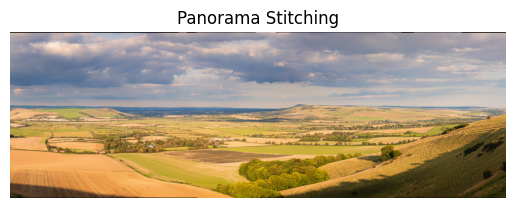

In [ ]:
# Create a stitcher object
stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)

# Stitch the images
status, stitched_image = stitcher.stitch(imgs_fov_small)
# Check if stitching was successful
if status == cv2.Stitcher_OK:
    plt.imshow(stitched_image)
    plt.title('Panorama Stitching')
    plt.axis('off')